# Random Forest
Today I learned about Random Forest models. These models are great for tabular data. Imagine getting a consensus over many different opinions vs just a single opinion. We can use random forest models to predict an outcome such as survival outcome of an event (such as Titanic) or churn models.

You can also look at the features being passed in and find which inputs make the most impact. In the scenario below, we look at gender, passenger class, and the number of parents and children the passenger had.

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [34]:
train_data = pd.read_csv("../kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
test_data = pd.read_csv("../kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [37]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# Random Forest Model

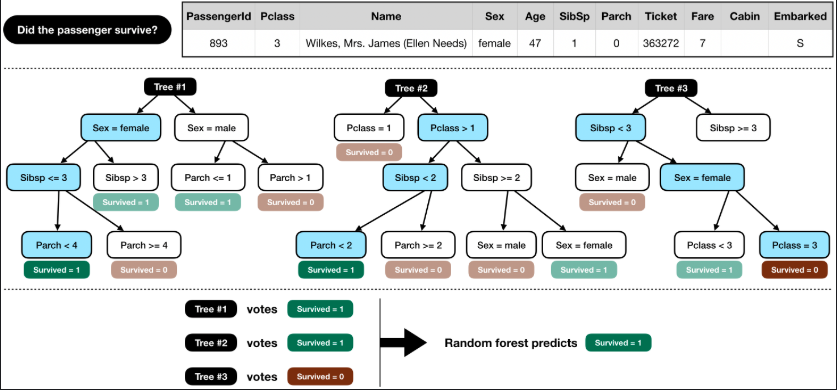

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('../kaggle/output/titanic/submission.csv', index=False)
print("Saved!")

Your submission was successfully saved!


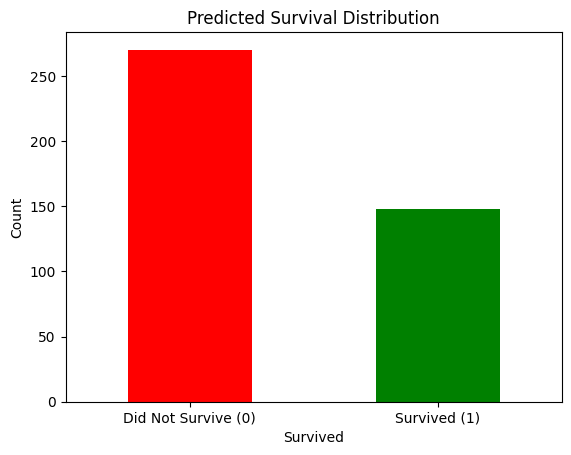

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your submission file
df = pd.read_csv("../kaggle/output/titanic/submission.csv")

# Bar chart of survival counts
df['Survived'].value_counts().plot(kind='bar', color=['red','green'])
plt.xticks([0,1], ['Did Not Survive (0)','Survived (1)'], rotation=0)
plt.ylabel("Count")
plt.title("Predicted Survival Distribution")
plt.show()


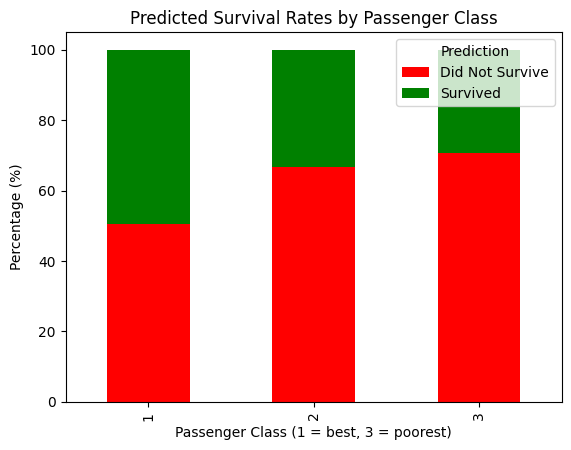

1 = 1st class (wealthiest passengers, best accommodations
2 = 2nd class (middle accommodations)
3 = 3rd class (poorest passengers, “steerage”)


In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge predictions with Pclass
merged = pd.concat([test_data[['Pclass']], df['Survived']], axis=1)

# Group by Pclass and Survived
plot_df = merged.groupby(['Pclass','Survived']).size().unstack()

# Rename columns for clarity
plot_df = plot_df.rename(columns={0: "Did Not Survive", 1: "Survived"})

# Convert counts to percentages row-wise
plot_df_percent = plot_df.div(plot_df.sum(axis=1), axis=0) * 100

# Plot
ax = plot_df_percent.plot(
    kind='bar',
    stacked=True,
    color=['red', 'green']
)

plt.title("Predicted Survival Rates by Passenger Class")
plt.ylabel("Percentage (%)")
plt.xlabel("Passenger Class (1 = best, 3 = poorest)")
plt.legend(title="Prediction")
plt.show()



print("1 = 1st class (wealthiest passengers, best accommodations")
print("2 = 2nd class (middle accommodations)")
print("3 = 3rd class (poorest passengers, “steerage”)")